In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install tensorflow
# !pip install spectrogram
import pandas as pd
import tensorflow as tf
import os
import numpy as np
import random
from numpy.lib import stride_tricks
import scipy.io.wavfile as wav
import math
import sklearn

In [ ]:
df_train = pd.read_excel('/content/drive/MyDrive/data/raw/labels/train_split_Depression_AVEC2017.xlsx')
df_dev = pd.read_excel('/content/drive/MyDrive/data/raw/labels/dev_split_Depression_AVEC2017.xlsx')
df_dev = pd.concat([df_train, df_dev], axis=0)
print(df_dev)
df_test = pd.read_excel('/content/drive/MyDrive/data/raw/labels/test_split_Depression_AVEC2017.xlsx')
df_dev = pd.concat([df_dev, df_test], axis=0)
print(df_dev)


    Participant_ID  PHQ8_Binary
0              303            0
1              304            0
2              305            0
3              310            0
4              312            0
..             ...          ...
30             483            1
31             484            0
32             489            0
33             490            0
34             492            0

[142 rows x 2 columns]
    Participant_ID  PHQ8_Binary
0              303            0
1              304            0
2              305            0
3              310            0
4              312            0
..             ...          ...
42             467            0
43             469            0
44             470            0
45             480            0
46             481            0

[189 rows x 2 columns]


In [ ]:
import librosa
def build_class_dictionaries(dir_name):
    X_d=[]
    X_nd=[]
    Y_d=[]
    Y_nd = []
    for subdir, dirs, files in os.walk(dir_name):
        for file in files:
            if file.endswith('no_silence.wav'):
                partic_id = int(file.split('_')[0][1:])
                if in_dev_split(partic_id):
                    depressed = get_depression_label(partic_id)  # 1 if True
                    audio_path = os.path.join(subdir, file)
                    counter = 0.1
                    while True:
                        print(f"{partic_id}, {counter}")
                        if counter>=1000:
                            break
                        else:
                            x , sr = librosa.load(audio_path,duration=5,sr=22050*2,offset=counter)
                            sample_rate = np.array(sr)
                            mat = librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=20)
                            mat=mat.T   
                            if np.array(mat).shape==(431,20):
                              # X.append(mat)           
                              if depressed:
                                  X_d.append(mat)
                                  Y_d.append(1)
                              else:
                                  X_nd.append(mat)
                                  Y_nd.append(0)
                            else:
                              break
                        counter+=10
    return X_d,Y_d,X_nd,Y_nd


def in_dev_split(partic_id):
    return partic_id in set(df_dev['Participant_ID'].values)


def get_depression_label(partic_id):
    return df_dev.loc[df_dev['Participant_ID'] == partic_id]['PHQ8_Binary'].item()

dir_name = r'/content/drive/MyDrive/data/processed'
X_d_1,Y_d_1,X_nd_1,Y_nd_1 = build_class_dictionaries(dir_name)


415, 180.1
415, 190.1
415, 200.1
415, 210.1
415, 220.1
415, 230.1
415, 240.1
415, 250.1
415, 260.1
415, 270.1
415, 280.1
415, 290.1
415, 300.1
415, 310.1
415, 320.1
415, 330.1
415, 340.1
415, 350.1
415, 360.1
415, 370.1
415, 380.1
415, 390.1
416, 0.1
416, 10.1
416, 20.1
416, 30.1
416, 40.1
416, 50.1
416, 60.1
416, 70.1
416, 80.1
416, 90.1
416, 100.1
416, 110.1
416, 120.1
416, 130.1
416, 140.1
416, 150.1
416, 160.1
416, 170.1
416, 180.1
416, 190.1
416, 200.1
416, 210.1
416, 220.1
416, 230.1
416, 240.1
416, 250.1
416, 260.1
416, 270.1
416, 280.1
416, 290.1
416, 300.1
416, 310.1
416, 320.1
416, 330.1
416, 340.1
416, 350.1
416, 360.1
416, 370.1
416, 380.1
416, 390.1
416, 400.1
416, 410.1
416, 420.1
416, 430.1
416, 440.1
416, 450.1
416, 460.1
416, 470.1
416, 480.1
416, 490.1
416, 500.1
416, 510.1
416, 520.1
416, 530.1
416, 540.1
416, 550.1
416, 560.1
416, 570.1
427, 0.1
427, 10.1
427, 20.1
427, 30.1
427, 40.1
427, 50.1
427, 60.1
427, 70.1
427, 80.1
427, 90.1
427, 100.1
427, 110.1
427, 120.1

<ipython-input-11-08fdaeec27f2>:20: UserWarning: PySoundFile failed. Trying audioread instead.
  x , sr = librosa.load(audio_path,duration=5,sr=22050*2,offset=counter)


Streaming output truncated to the last 5000 lines.
368, 510.1
368, 520.1
368, 530.1
368, 540.1
368, 550.1
368, 560.1
368, 570.1
368, 580.1
368, 590.1
368, 600.1
368, 610.1
368, 620.1
368, 630.1
368, 640.1
368, 650.1
368, 660.1
368, 670.1
368, 680.1
368, 690.1
368, 700.1
368, 710.1
368, 720.1
368, 730.1
368, 740.1
368, 750.1
368, 760.1
368, 770.1
368, 780.1
368, 790.1
368, 800.1
368, 810.1
368, 820.1
368, 830.1
368, 840.1
368, 850.1
368, 860.1
368, 870.1
368, 880.1
368, 890.1
368, 900.1
370, 0.1
370, 10.1
370, 20.1
370, 30.1
370, 40.1
370, 50.1
370, 60.1
370, 70.1
370, 80.1
370, 90.1
370, 100.1
370, 110.1
370, 120.1
370, 130.1
370, 140.1
370, 150.1
370, 160.1
370, 170.1
370, 180.1
370, 190.1
370, 200.1
370, 210.1
370, 220.1
370, 230.1
370, 240.1
370, 250.1
370, 260.1
370, 270.1
370, 280.1
370, 290.1
370, 300.1
370, 310.1
370, 320.1
370, 330.1
370, 340.1
370, 350.1
370, 360.1
370, 370.1
370, 380.1
370, 390.1
370, 400.1
370, 410.1
370, 420.1
370, 430.1
370, 440.1
370, 450.1
370, 460.1
370

In [ ]:
# print(len(X[0][0]))

20


In [ ]:
X_d,Y_d = sklearn.utils.shuffle(X_d_1, Y_d_1)
X_nd,Y_nd = sklearn.utils.shuffle(X_nd_1, Y_nd_1)

min_len = min(len(X_d),len(X_nd))
X_d = X_d[:min_len]
Y_d = Y_d[:min_len]
X_nd = X_nd[:min_len]
Y_nd = Y_nd[:min_len] 

X=X_d.copy()
X.extend(X_nd)
Y=Y_d.copy()
Y.extend(Y_nd)

X,Y = sklearn.utils.shuffle(X,Y)


In [ ]:
# split a dataset into train and test sets
from sklearn.model_selection import train_test_split

# split into train test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
print(Y_train)
Y_test = np.array(Y_test)
print(Y_test)

[0 0 1 ... 0 1 0]
[0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0
 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0
 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0
 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1
 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1
 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1
 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1
 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0
 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1
 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1
 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1
 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0
 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1
 0 1 0 

In [ ]:
dir_name = r'/content/drive/MyDrive/data/processed'

# save as npz locally
print("Saving npz file locally...")
np.savez(dir_name+'/train_samples.npz', X_train)
np.savez(dir_name+'/train_labels.npz', Y_train)
np.savez(dir_name+'/test_samples.npz', X_test)
np.savez(dir_name+'/test_labels.npz', Y_test)

Saving npz file locally...


In [ ]:
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from keras.layers import Conv1D, MaxPooling1D
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt

In [ ]:
# CNN parameters
batch_size = 32
nb_classes = 2
epochs = 50

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

print(Y_train.shape)

print(X_train.shape)
input_shape = (X_train.shape[1], X_train.shape[2])
print(input_shape)

(3902, 2)
(3902, 431, 20)
(431, 20)


In [ ]:
epochs=50

In [ ]:
def cnn(X_train, Y_train, X_test, Y_test, batch_size, epochs, input_shape):

    model = Sequential()
    model.add(Conv1D(256, 5,padding='same',
                    input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(128, 4,padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=(4)))
    model.add(Dropout(0.05))
    model.add(Conv1D(64, 3,padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=(4)))
    model.add(Flatten())
    model.add(Dense(32))
    model.add(Dense(2))
    model.add(Activation('softmax'))   

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    print(model.summary())

    history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,verbose=1, validation_data=(X_test, Y_test))
    # Evaluate accuracy on test and train sets
    score_train = model.evaluate(X_train, Y_train, verbose=0)
    print('Train accuracy:', score_train[1])
    score_test = model.evaluate(X_test, Y_test, verbose=0)
    print('Test accuracy:', score_test[1])

    return model, history


In [ ]:
# run CNN
print('Fitting model...')
model, history = cnn(X_train, Y_train, X_test, Y_test, batch_size, epochs, input_shape=input_shape)


Fitting model...
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 431, 256)          25856     
                                                                 
 activation_24 (Activation)  (None, 431, 256)          0         
                                                                 
 max_pooling1d_18 (MaxPoolin  (None, 53, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_19 (Conv1D)          (None, 53, 128)           131200    
                                                                 
 activation_25 (Activation)  (None, 53, 128)           0         
                                                                 
 max_pooling1d_19 (MaxPoolin  (None, 13, 128)          0         
 g1D)                                

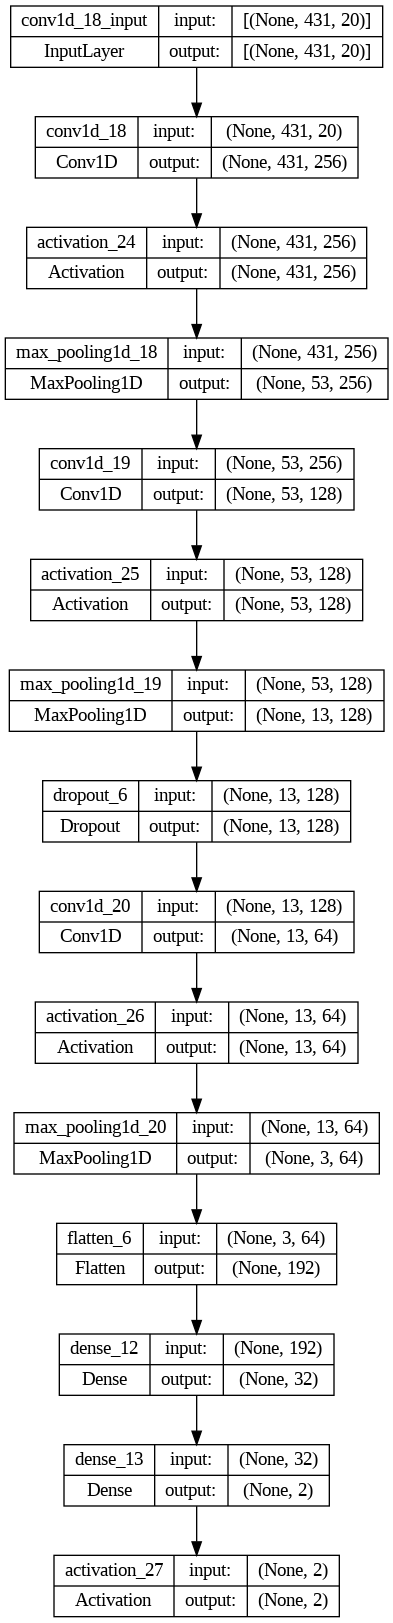

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

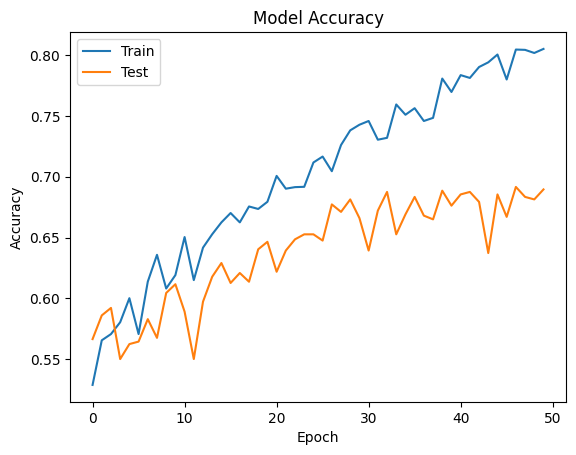

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

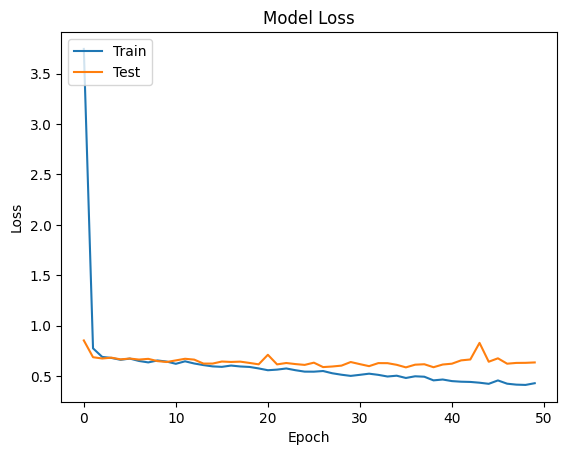

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
print(list(model.predict(X_test))[10])
print(list(Y_test)[10])

31/31 [==============================] - 0s 3ms/step
[0.98019356 0.01980642]
[1. 0.]


In [ ]:
def model_performance(model, X_train, X_test, Y_train, Y_test):
  Y_test_pred = np.argmax(model.predict(X_test), axis=-1)
  Y_train_pred = np.argmax(model.predict(X_train), axis=-1)

  Y_test_1d = Y_test[:, 1]

  # Computing confusion matrix for test dataset
  [[tn, fp], [fn, tp]] = confusion_matrix(Y_test_1d, Y_test_pred)
  conf_matrix = np.array([[tp, fp], [fn, tn]])
  print("Confusion Matrix:")
  print(conf_matrix)

  # return Y_train_pred, Y_test_pred, Y_train_pred_proba, \
  #     Y_test_pred_proba, conf_matrix
  return Y_train_pred, Y_test_pred, conf_matrix
# evaluate model
print('Evaluating model...')
y_train_pred, y_test_pred, conf_matrix = model_performance(model, X_train, X_test, Y_train, Y_test)

accuracy = float(conf_matrix[0][0] + conf_matrix[1][1]) / np.sum(conf_matrix)
precision = float(conf_matrix[0][0]) / (conf_matrix[0][0] + conf_matrix[0][1])
recall = float(conf_matrix[0][0]) / (conf_matrix[0][0] + conf_matrix[1][0])
f1_score = 2 * (precision * recall) / (precision + recall)
print("Accuracy: {}".format(accuracy))
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))
print("F1-Score: {}".format(f1_score))

Evaluating model...
122/122 [==============================] - 0s 3ms/step
Confusion Matrix:
[[367 192]
 [111 306]]
Accuracy: 0.6895491803278688
Precision: 0.6565295169946332
Recall: 0.7677824267782427
F1-Score: 0.7078109932497588
